BY:</br>
Abhinandan Vishwaroop</br>
Dataset Chosen: Pokemon Dataset from Kaggle

First we access the data set and store it in a dataframe object. here the dataframe object is called pokeframe:

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt 
pokeframe = pd.read_csv('pokemon.csv')
print(pokeframe)

                       abilities  against_bug  against_dark  against_dragon  \
0    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
1    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
2    ['Overgrow', 'Chlorophyll']         1.00           1.0             1.0   
3       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
4       ['Blaze', 'Solar Power']         0.50           1.0             1.0   
..                           ...          ...           ...             ...   
796              ['Beast Boost']         0.25           1.0             0.5   
797              ['Beast Boost']         1.00           1.0             0.5   
798              ['Beast Boost']         2.00           0.5             2.0   
799              ['Prism Armor']         2.00           2.0             1.0   
800               ['Soul-Heart']         0.25           0.5             0.0   

     against_electric  against_fairy  against_fight

**Handling Duplicate values:**

Next we drop the duplicate rows if any

In [2]:
pokeframe.drop_duplicates()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Next we check for missing values

In [3]:
pokeframe.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


**Handling Missing Values**

Out of all the attributs in the data set, the ones missing or having null values are height_m, weight_kg, percentage_male and type2.
Among those we can substitute the null values of height and weight attributes by their respective mean to have a more complete dataset. 
type2 attribute null values cannot be substituted by its mean since only some pokemon have that attribute, so we will substitute those values with a meaningfull value.
Similarly for percentage_male attribute, the null values indicate the pokemon is genderless hence we will substitute it with a meaningfull value as well

In [4]:
pokeframe['type2'].fillna('None', inplace=True) 
pokeframe['percentage_male'].fillna('None', inplace=True) 
pokeframe['height_m'].fillna(pokeframe['height_m'].mean(), inplace=True) 
pokeframe['weight_kg'].fillna(pokeframe['weight_kg'].mean(), inplace=True)
pokeframe.isnull().sum()

abilities            0
against_bug          0
against_dark         0
against_dragon       0
against_electric     0
against_fairy        0
against_fight        0
against_fire         0
against_flying       0
against_ghost        0
against_grass        0
against_ground       0
against_ice          0
against_normal       0
against_poison       0
against_psychic      0
against_rock         0
against_steel        0
against_water        0
attack               0
base_egg_steps       0
base_happiness       0
base_total           0
capture_rate         0
classfication        0
defense              0
experience_growth    0
height_m             0
hp                   0
japanese_name        0
name                 0
percentage_male      0
pokedex_number       0
sp_attack            0
sp_defense           0
speed                0
type1                0
type2                0
weight_kg            0
generation           0
is_legendary         0
dtype: int64

We now check for the data types of each attribute

In [5]:
pokeframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

Event though capture_rate has numeric values, it is classified as object data type. We need to resolve this.
This issue arrises due to the 774th row value for capture_rate attibute where there are two capture rates making the whole attribute of object type.

In [6]:
print(pokeframe.loc[773])

abilities                    ['Shields Down']
against_bug                               0.5
against_dark                              1.0
against_dragon                            1.0
against_electric                          2.0
against_fairy                             1.0
against_fight                             1.0
against_fire                              0.5
against_flying                            0.5
against_ghost                             1.0
against_grass                             1.0
against_ground                            0.0
against_ice                               2.0
against_normal                            0.5
against_poison                            0.5
against_psychic                           1.0
against_rock                              2.0
against_steel                             2.0
against_water                             2.0
attack                                    100
base_egg_steps                           6400
base_happiness                    

As shown above the capture_rate attibute is set to "30 (Meteorite)255 (Core)". We resolve this after checking its other attributes and selecting one of the capture rates

In [7]:
pokeframe[pokeframe["capture_rate"]== "30 (Meteorite)255 (Core)"][['name','capture_rate','type1','generation','classfication']]

,name,capture_rate,type1,generation,classfication
773,Minior,30 (Meteorite)255 (Core),rock,7,Meteor Pokémon


Since Minior, the pokemon in question is a Meteor pokemon, we will use the 'Meteorite' capture rate since it is more relevant. We also will change the datat type of the capture_rate attribute to int32

In [8]:
pokeframe["capture_rate"].replace({'30 (Meteorite)255 (Core)': '30'}, inplace=True)
pokeframe['capture_rate'] = pokeframe['capture_rate'].astype('int')
pokeframe['capture_rate'].dtype

dtype('int32')

**Removing irrelavant data**

Now, in the data set there are 3 attributes that are unnecessary. These include japanese_name, percentage_male and pokedex_number. Hence we will remove these. we will also make the name attribute the first attribute to identify the pokemon easily.

In [9]:
pokeframe.drop(columns=['japanese_name', 'pokedex_number', 'percentage_male'], axis=1, inplace=True) 
pokeframe.insert(0, 'name', pokeframe.pop('name'))

We will also merge type1 and type2 values in a single 'type' attribute.

In [10]:
pokeframe['type'] =  pokeframe.apply(lambda x: x['type1'] if pd.isnull(x['type2']) else f'{x["type1"]}_{x["type2"]}', axis=1)
pokeframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

We will also add an attribute to hold the total number of abilities the pokemon has

In [11]:
pokeframe["tot_abilities"] = pokeframe.apply(lambda x: len(x["abilities"]), axis=1)
pokeframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               801 non-null    object 
 1   abilities          801 non-null    object 
 2   against_bug        801 non-null    float64
 3   against_dark       801 non-null    float64
 4   against_dragon     801 non-null    float64
 5   against_electric   801 non-null    float64
 6   against_fairy      801 non-null    float64
 7   against_fight      801 non-null    float64
 8   against_fire       801 non-null    float64
 9   against_flying     801 non-null    float64
 10  against_ghost      801 non-null    float64
 11  against_grass      801 non-null    float64
 12  against_ground     801 non-null    float64
 13  against_ice        801 non-null    float64
 14  against_normal     801 non-null    float64
 15  against_poison     801 non-null    float64
 16  against_psychic    801 non

**Correlation of all features**

Now we find the correlation Matrix between the attributes.

In [12]:
pokeframe.corr()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,experience_growth,height_m,hp,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,tot_abilities
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,...,0.035717,-0.059781,0.034897,0.055352,-0.002342,-0.043802,-0.031344,-0.001549,0.027864,-0.009296
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,...,-0.008391,0.018608,0.010589,0.170849,0.132507,-0.000326,0.037634,-0.016013,0.136315,-0.133164
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,...,0.172547,0.164448,0.089721,0.039739,-0.047416,0.078123,0.125991,-0.025201,0.014844,-0.065178
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,...,-0.041584,0.003022,-0.035354,0.022305,0.019193,0.111422,-0.101403,-0.063180,-0.023151,-0.009941
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,...,0.146370,0.114993,0.129284,-0.010296,0.002754,0.065401,0.098210,0.150801,0.050165,-0.026883
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,...,0.010407,0.058524,0.109425,-0.118481,-0.044460,-0.050495,0.159761,0.000681,-0.059132,0.112843
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,...,-0.027136,-0.085422,-0.099242,-0.088578,-0.019520,-0.079129,-0.043925,0.061157,-0.011073,-0.037781
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,...,0.019100,-0.072533,-0.060624,-0.111243,-0.079022,-0.043381,-0.125959,0.058204,-0.062214,-0.014460
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,...,0.059262,0.031626,-0.062052,0.233309,0.195439,-0.029007,0.046506,0.038027,0.170746,-0.153541
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,...,-0.039623,0.029533,0.056886,-0.093899,-0.056427,-0.153618,0.048407,-0.107987,-0.070826,0.163818


We can also see the data of pokemon against certain other types of pokemon. This data is relevant to find the strongest type of pokemon, but for the purpose of finding whether a pokemon is legendary or not, it doesnt contribute much. 

Hence instead of removing the data completely we will just split the data into two parts, one with the against attributes and the other with the remaining attributes. 

We do this by storing the against attribute names in a list and the other attribute name sin a separate list. we then create two different dataframes and store the respective attributes in them. 

This keeps the against and rest attributes separately for when they need to be used while also holding the original dataframe separately.

In [13]:
against=[]
rest=[]
for i in pokeframe.columns:
    if 'against' in i:
        against.append(i)
    else:
        rest.append(i)

againstframe=pokeframe[against]
restframe=pokeframe[rest]
print(againstframe)
print(restframe)

     against_bug  against_dark  against_dragon  against_electric  \
0           1.00           1.0             1.0               0.5   
1           1.00           1.0             1.0               0.5   
2           1.00           1.0             1.0               0.5   
3           0.50           1.0             1.0               1.0   
4           0.50           1.0             1.0               1.0   
..           ...           ...             ...               ...   
796         0.25           1.0             0.5               2.0   
797         1.00           1.0             0.5               0.5   
798         2.00           0.5             2.0               0.5   
799         2.00           2.0             1.0               1.0   
800         0.25           0.5             0.0               1.0   

     against_fairy  against_fight  against_fire  against_flying  \
0              0.5            0.5           2.0             2.0   
1              0.5            0.5           2.0  

**Correlation heatmaps**

We can now find the correlation of both dataframes separately and plot it for better readability using a heat map

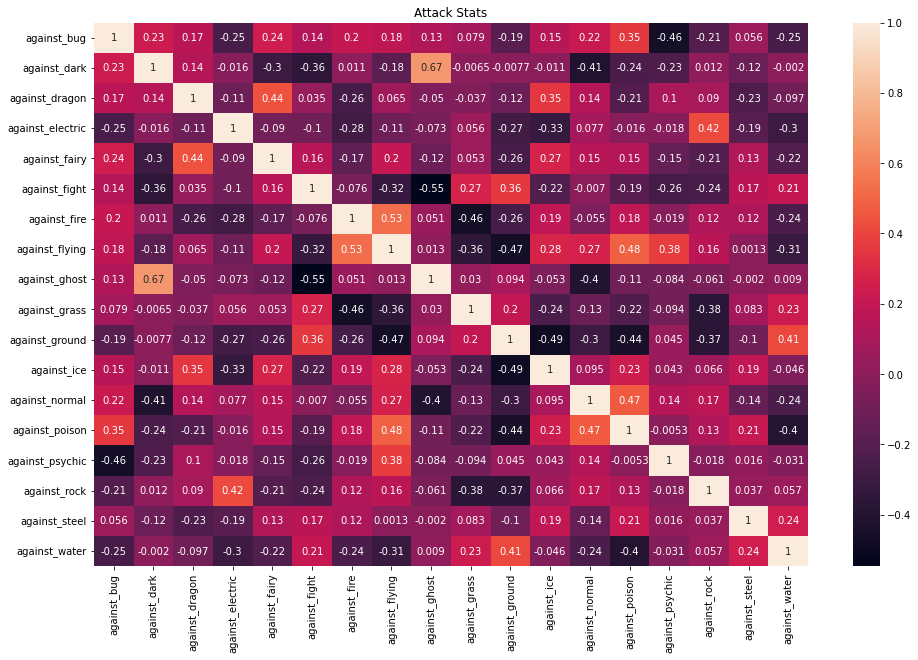

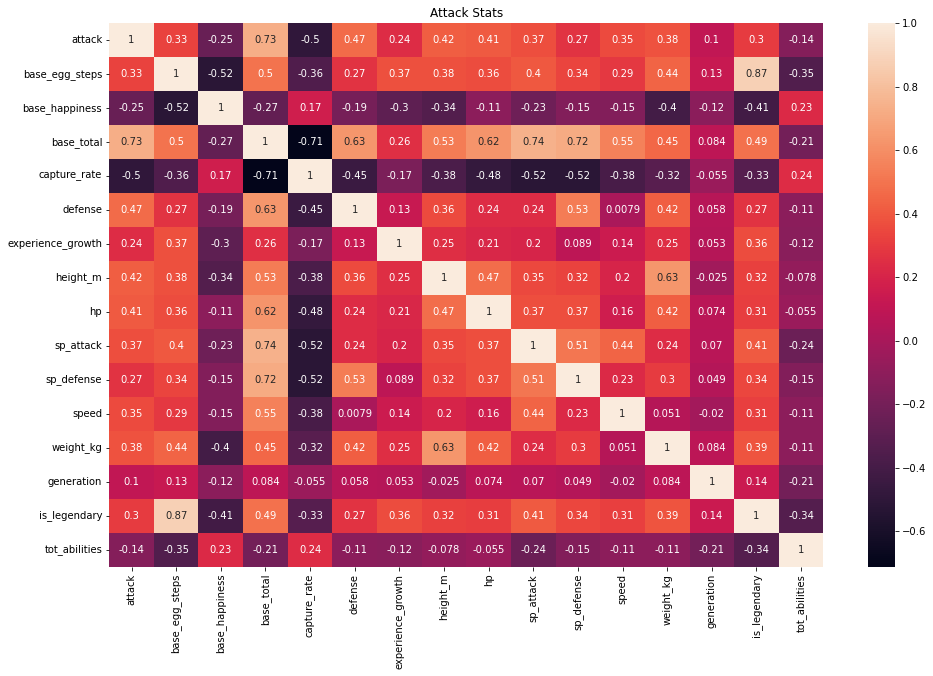

In [14]:
#for againstframe
fig,axes = plt.subplots(figsize=(16,10)) #to set the size of subplot else it will be very small 
sns.heatmap(againstframe.corr(),annot=True).set_title('Attack Stats') #annot -  an array of the same shape as data which is used to annotate the heatmap
plt.show()


#for restframe
fig,axes = plt.subplots(figsize=(16,10))
sns.heatmap(restframe.corr(),annot=True).set_title('Attack Stats')
plt.show()

**Normalization**

Now we normalize the updated restframe and store it in a separate dataframe so we can still access the current restframe. Before doing so, we need to separate the data that cannot be normalised. So we remove them from a copy of the restframe dataframe

In [15]:
copyframe = restframe.copy()
copyframe.drop(columns = ["name", "abilities", "classfication", "type", "type1", "type2"], axis=1, inplace=True)
independent=[]
dependent=[]
for i in copyframe.columns:
    if i!="is_legendary":
        independent.append(i)
    else:
        dependent.append(i)
X_data = copyframe[independent]
target=copyframe[dependent]
data = preprocessing.normalize(X_data, axis =0)
normalised_df = pd.DataFrame(data, columns=X_data.columns)
print(normalised_df)
print(copyframe)
print(restframe)

       attack  base_egg_steps  base_happiness  base_total  capture_rate  \
0    0.020555        0.018593        0.036248    0.025270      0.012753   
1    0.026008        0.018593        0.036248    0.032184      0.012753   
2    0.041948        0.018593        0.036248    0.049666      0.012753   
3    0.021813        0.018593        0.036248    0.024555      0.012753   
4    0.026847        0.018593        0.036248    0.032184      0.012753   
..        ...             ...             ...         ...           ...   
796  0.042368        0.111559        0.000000    0.045296      0.007085   
797  0.075927        0.111559        0.000000    0.045296      0.072269   
798  0.042368        0.111559        0.000000    0.045296      0.004251   
799  0.044885        0.111559        0.000000    0.047680      0.000850   
800  0.039851        0.111559        0.000000    0.047680      0.000850   

      defense  experience_growth  height_m        hp  sp_attack  sp_defense  \
0    0.021855       

**Standardization**

We also create a dataframe to store the standardized data

In [16]:
standard = preprocessing.scale(X_data)
print(standard)

[[-0.89790944 -0.3159859   0.23679079 ... -0.50483939 -1.39455066
  -0.45645965]
 [-0.49341318 -0.3159859   0.23679079 ... -0.44831172 -1.39455066
  -0.45645965]
 [ 0.6889605  -0.3159859   0.23679079 ...  0.35790257 -1.39455066
  -0.45645965]
 ...
 [ 0.72007559  3.58995097 -3.33706107 ...  7.66016538  1.71552381
  -1.4749114 ]
 [ 0.90676617  3.58995097 -3.33706107 ...  1.5625906   1.71552381
  -1.4749114 ]
 [ 0.53338501  3.58995097 -3.33706107 ...  0.17719937  1.71552381
  -1.55978238]]


**Principal Component Analysis**

We can now perform Principal Component Analysis and the reduce the dimensions using the normalised dataframe. We reduce the data from 15 columns to 6 columns.

Shape before PCA:  (801, 15)
Shape after PCA:  (801, 15)


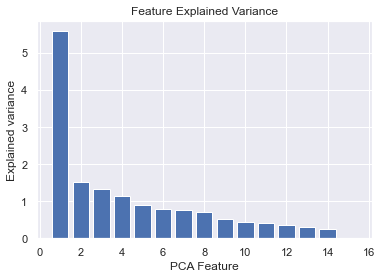

In [17]:
pca = PCA(n_components=15)

pca_features = pca.fit_transform(standard)
                                
print('Shape before PCA: ', standard.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15'])

sns.set()
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()



**Dimensionality Reduction**

From the above distribution, we can see that PCs 1 to 8 are the most significant. Hence we discard the rest to reduce the dimensionality

Shape before PCA:  (801, 15)
Shape after PCA:  (801, 8)


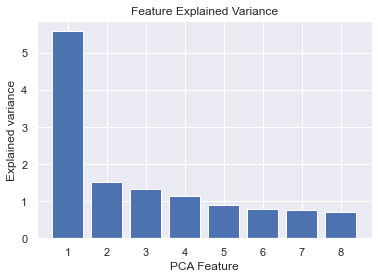

In [18]:
pca = PCA(n_components=8)

pca_features = pca.fit_transform(standard)
                                
print('Shape before PCA: ', standard.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

sns.set()
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Now we add the target values to the Princical component dataframe

In [19]:
pca_df['target'] = target

 
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,target
0,-1.524186,-0.107556,-0.259812,0.405462,1.317977,0.401438,-0.684504,-0.747528,0
1,-0.360312,-0.689345,-0.252492,0.448600,1.209745,0.376145,-0.631508,-0.604644,0
2,2.829890,-1.888899,0.470890,-0.029924,1.448195,-0.157533,-0.438980,-0.210842,0
3,-1.688041,0.021813,-0.771116,0.782983,1.167843,0.151885,-0.294400,-1.084814,0
4,-0.345063,-0.583742,-0.694264,0.866794,1.015219,0.273260,-0.237774,-0.939687,0
...,...,...,...,...,...,...,...,...,...
796,8.690758,6.372111,4.266291,0.100108,0.172431,3.030517,2.920821,0.047733,1
797,2.697451,3.821498,-2.212796,-0.146174,-0.319056,-3.601506,1.359627,0.056505,1
798,7.643030,5.999475,3.429306,0.557416,-2.593875,4.750588,1.321380,-1.170355,1
799,5.408935,3.260949,-1.243195,-0.506256,0.242282,0.369598,0.396794,0.833373,1


**To implement Decision Tree algorithm and perform performance evaluation**

1. First we import the required modules and methods.
2. We save the decision tree model in a variable called Dtree
3. We split the independednt and target values in X and Y
4. We split the training and testing data for both X and Y
5. We fit the training data (forboth X and Y) in the Decision tree and save it in model variable
6. We first show text representation of the decision tree along with the graphical representation

**Note**: The decision tree changes as the Decision tree classifier has a estimator which is randomly controlled. the random_state parameter controls the randomness of the estimator. 

|--- feature_1 <= 15360.00
|   |--- feature_4 <= 9.00
|   |   |--- feature_1 <= 8320.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  8320.00
|   |   |   |--- class: 0
|   |--- feature_4 >  9.00
|   |   |--- class: 0
|--- feature_1 >  15360.00
|   |--- class: 1



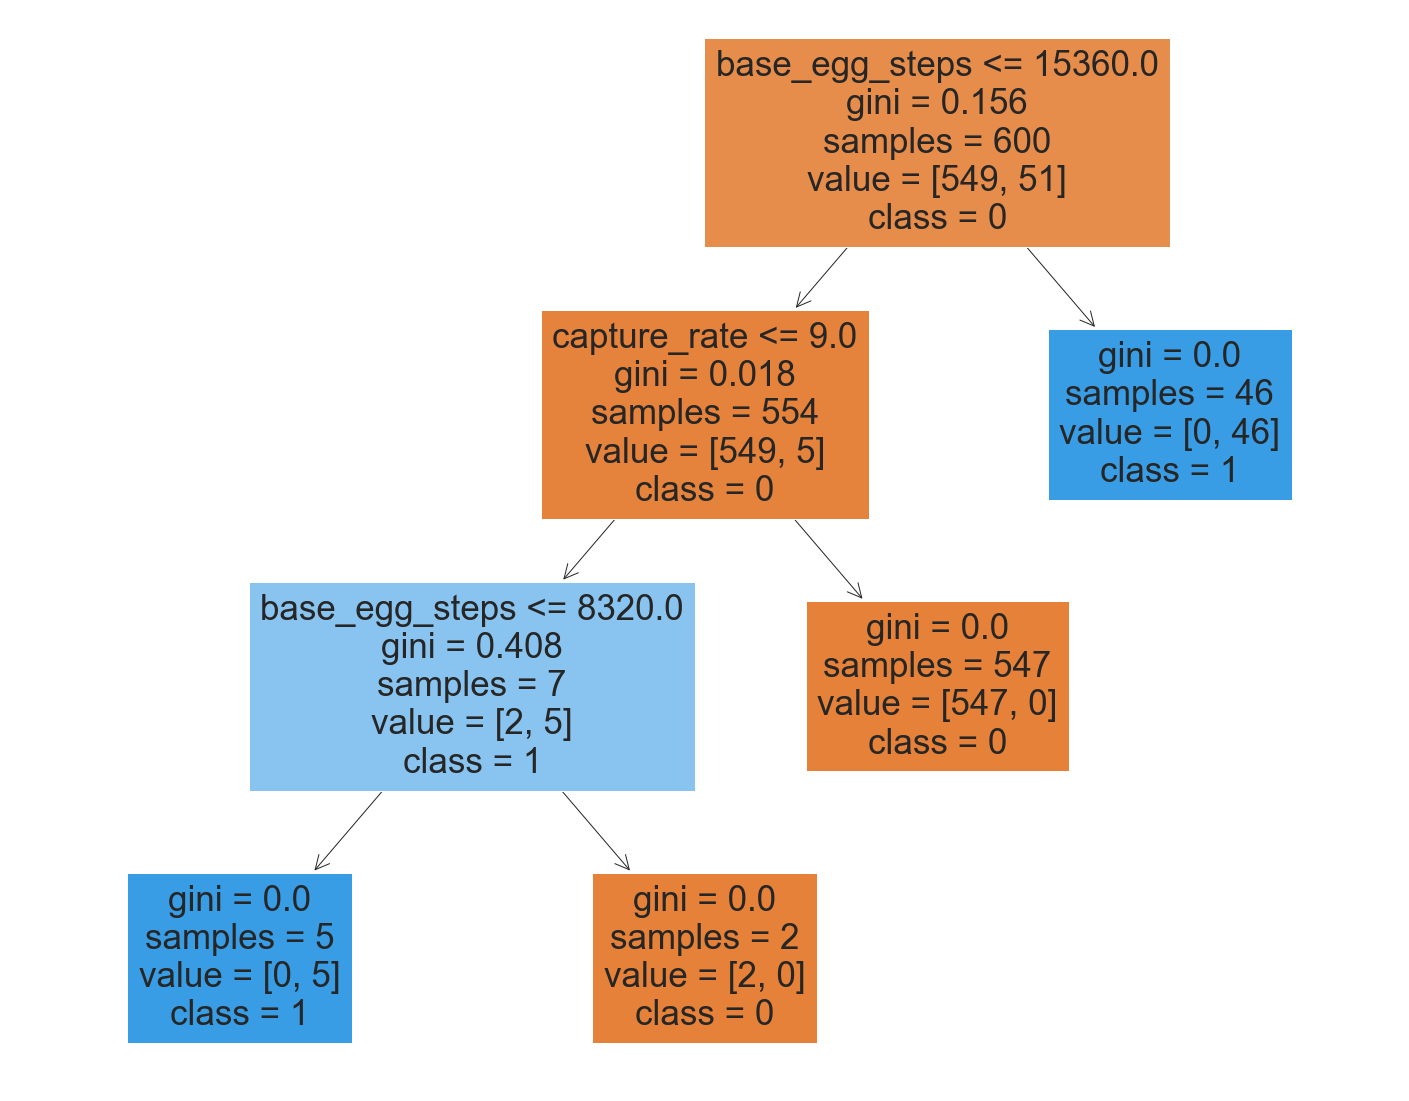

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn import tree

Dtree = DecisionTreeClassifier(random_state=42)

X = copyframe.drop(["is_legendary"], axis=1)
Y = copyframe["is_legendary"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

model = Dtree.fit(X_train, Y_train)
text_representation = tree.export_text(Dtree)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Dtree, 
                   feature_names=X.columns,  
                   class_names=['0','1'],
                   filled=True)

Now we evaluate the accuracy of the Decision tree classifier
**Note**: the accuracy changes when running the code multiple times. this is due to the decision tree changing as mentioned in the previous cell.

In [21]:
Y_pred = model.predict(X_test)
accuracy = round(accuracy_score(Y_test, Y_pred)*100, 2)
print("Accuracy : ", accuracy, "%")
print("Roc_Auc_Score : ", roc_auc_score(Y_test, Y_pred))

Accuracy :  99.0 %
Roc_Auc_Score :  0.9945054945054945


**THANK YOU**